In [157]:
import numpy as np
import pandas as pd

In [158]:
import numpy as np
import pandas as pd

In [159]:
df_circuits  = pd.read_csv("data/circuits.csv")
df_drivers  = pd.read_csv("data/drivers.csv")
df_constructor_results  = pd.read_csv("data/constructor_results.csv")
df_constructor_standings  = pd.read_csv("data/constructor_standings.csv")
df_constructor  = pd.read_csv("data/constructors.csv")
df_driver_standings  = pd.read_csv("data/driver_standings.csv")
df_drivers = pd.read_csv("data/drivers.csv")
df_lap_times  = pd.read_csv("data/lap_times.csv")
df_pit_stops  = pd.read_csv("data/pit_stops.csv")
df_qualifying  = pd.read_csv("data/qualifying.csv")
df_races  = pd.read_csv("data/races.csv")
df_results  = pd.read_csv("data/results.csv")
df_seasons  = pd.read_csv("data/seasons.csv")
df_sprint_results  = pd.read_csv("data/sprint_results.csv")
df_status  = pd.read_csv("data/status.csv")

In [160]:
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


In [161]:
df_qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N
10250,10308,1132,825,210,20,17,1:32.905,\N,\N
10251,10309,1132,839,214,31,18,1:34.557,\N,\N
10252,10310,1132,815,9,11,19,1:38.348,\N,\N


In [162]:
# First data about qualifying
df_qualifying.merge(df_races[['raceId', 'year']], on='raceId')['year'].min()

1994

In [163]:
# adding years to qualifying
df_qualifying = df_qualifying.merge(df_races[['raceId', 'year']], on='raceId', how='left')
df_qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,year
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,2008
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,2008
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,2008
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,2008
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2008
...,...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N,2024
10250,10308,1132,825,210,20,17,1:32.905,\N,\N,2024
10251,10309,1132,839,214,31,18,1:34.557,\N,\N,2024
10252,10310,1132,815,9,11,19,1:38.348,\N,\N,2024


In [164]:
df_qualifying = df_qualifying.replace('\\N', 0)
df_qualifying = df_qualifying.fillna(0)
df_results['milliseconds'] = df_results['milliseconds'].replace('\\N', 0)
df_results['fastestLapTime'] = df_results['fastestLapTime'].replace('\\N', 0)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].replace('\\N', 0)
df_results['milliseconds'] = df_results['milliseconds'].astype(float)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].astype(float)

In [165]:
# adding date
df_results = df_results.merge(df_races[['raceId', 'date', 'circuitId']], on='raceId')

In [166]:
# Driver Age

df_age = df_results[['raceId', 'driverId', 'date']]
df_age = pd.merge(df_age, df_drivers[['driverId', 'dob']], on='driverId', how='left')

# Convert date and dob columns to datetime
df_age['dob'] = pd.to_datetime(df_age['dob'])
df_age['date'] = pd.to_datetime(df_age['date'])

# Calculate age at the time of each race
df_age['driverAge'] = (df_age['date'] - df_age['dob']).dt.days // 365

# Create the new dataframe with 'raceId', 'driverId', and 'age'
df_driver_age = df_age[['raceId', 'driverId', 'driverAge']]

In [167]:
df_driver_age

,raceId,driverId,driverAge
0,18,1,23
1,18,2,30
2,18,3,22
3,18,4,26
4,18,5,26
...,...,...,...
26514,1132,839,27
26515,1132,815,34
26516,1132,855,25
26517,1132,847,26


In [168]:
df_driver_experience = df_results[['raceId', 'driverId', 'date']].sort_values('date')

# Calculate the cumulative count of each driver
df_driver_experience['driverXpRace'] = df_driver_experience.groupby('driverId').cumcount() + 1
df_driver_experience

,raceId,driverId,date,driverXpRace
20155,833,785,1950-05-13,1
20162,833,666,1950-05-13,1
20161,833,788,1950-05-13,1
20160,833,790,1950-05-13,1
20159,833,661,1950-05-13,1
...,...,...,...,...
26500,1132,830,2024-07-07,197
26499,1132,1,2024-07-07,344
26517,1132,847,2024-07-07,116
26507,1132,848,2024-07-07,93


In [169]:
# remove redundant data
df_results.drop(['position', 'positionText'], axis=1, inplace=True)

In [170]:
df_train = df_results

In [171]:
# add driver experience per race
df_train = df_train.merge(df_driver_experience[['raceId','driverId', 'driverXpRace']],
                          on=['raceId', 'driverId'],  how='left')

In [172]:
# add driver age in each race
df_train = df_train.merge(df_driver_age[['raceId', 'driverId', 'driverAge']],
                          on=['raceId', 'driverId'], how='left')

In [173]:
# add qualifying data
df_train = df_train.merge(df_qualifying[['q1','q2','q3','year','raceId','driverId']],
                     how='left', left_on=['raceId','driverId'],
                     right_on = ['raceId','driverId'])

In [174]:
df_train.loc[:, ['raceId', 'date', 'resultId']].drop_duplicates(subset=['resultId'])

,raceId,date,resultId
0,18,2008-03-16,1
1,18,2008-03-16,2
2,18,2008-03-16,3
3,18,2008-03-16,4
4,18,2008-03-16,5
...,...,...,...
27132,1132,2024-07-07,26520
27133,1132,2024-07-07,26521
27134,1132,2024-07-07,26522
27135,1132,2024-07-07,26523


In [175]:
# take only years between 1996-2002, 2006-2024
df_train = df_train[(df_train['year'] >= 1996) & (df_train['year'] <= 2024)]
df_train = df_train[(df_train['year'] <= 2002) | (df_train['year'] >= 2006)]

In [176]:
df_train

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,time,...,fastestLapSpeed,statusId,date,circuitId,driverXpRace,driverAge,q1,q2,q3,year
0,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,218.300,1,2008-03-16,1,18,23,1:26.572,1:25.187,1:26.714,2008.0
1,2,18,2,2,3,5,2,8.0,58,+5.478,...,217.586,1,2008-03-16,1,134,30,1:25.960,1:25.518,1:27.236,2008.0
2,3,18,3,3,7,7,3,6.0,58,+8.163,...,216.719,1,2008-03-16,1,36,22,1:26.295,1:26.059,1:28.687,2008.0
3,4,18,4,4,5,11,4,5.0,58,+17.181,...,215.464,1,2008-03-16,1,106,26,1:26.907,1:26.188,0,2008.0
4,5,18,5,1,23,3,5,4.0,58,+18.014,...,218.385,1,2008-03-16,1,18,26,1:25.664,1:25.452,1:27.079,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,26520,1132,839,214,31,18,16,0.0,50,\N,...,233.371,12,2024-07-07,9,145,27,1:34.557,0,0,2024.0
27133,26521,1132,815,9,11,0,17,0.0,50,\N,...,236.409,12,2024-07-07,9,271,34,1:38.348,0,0,2024.0
27134,26522,1132,855,15,24,14,18,0.0,50,\N,...,233.014,12,2024-07-07,9,56,25,1:31.190,1:27.867,0,2024.0
27135,26523,1132,847,131,63,1,19,0.0,33,\N,...,232.289,34,2024-07-07,9,116,26,1:30.106,1:26.723,1:25.819,2024.0


In [177]:
df_train.loc[:, ['raceId', 'date', 'resultId']].drop_duplicates(subset=['resultId'])

,raceId,date,resultId
0,18,2008-03-16,1
1,18,2008-03-16,2
2,18,2008-03-16,3
3,18,2008-03-16,4
4,18,2008-03-16,5
...,...,...,...
27132,1132,2024-07-07,26520
27133,1132,2024-07-07,26521
27134,1132,2024-07-07,26522
27135,1132,2024-07-07,26523


In [178]:
def minutes_to_seconds(time):
    if pd.isnull(time):
        return np.nan
    if type(time) != int:
        minutes, seconds = time.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
        return total_seconds


columns = ['q1', 'q2', 'q3']

for column in columns:
    df_train[column] = df_train[column].replace('\\N', np.nan)
    df_train[column] = df_train[column].apply(minutes_to_seconds)

In [179]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8388 entries, 0 to 27136
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         8388 non-null   int64  
 1   raceId           8388 non-null   int64  
 2   driverId         8388 non-null   int64  
 3   constructorId    8388 non-null   int64  
 4   number           8388 non-null   object 
 5   grid             8388 non-null   int64  
 6   positionOrder    8388 non-null   int64  
 7   points           8388 non-null   float64
 8   laps             8388 non-null   int64  
 9   time             8388 non-null   object 
 10  milliseconds     8388 non-null   float64
 11  fastestLap       8388 non-null   object 
 12  rank             8388 non-null   object 
 13  fastestLapTime   8388 non-null   object 
 14  fastestLapSpeed  8388 non-null   float64
 15  statusId         8388 non-null   int64  
 16  date             8388 non-null   object 
 17  circuitId        8

In [180]:
df_train['fastestLap'] = df_train['fastestLap'].replace('\\N',0)
df_train['fastestLap'] = df_train['fastestLap'].astype(int)

In [181]:
# q1, q2, q3 null values fill with 0
df_train[columns] = df_train[columns].fillna(0)

In [182]:
df_train['fastestLapTime']

0        1:27.452
1        1:27.739
2        1:28.090
3        1:28.603
4        1:27.418
           ...   
27132    1:30.875
27133    1:29.707
27134    1:31.014
27135    1:31.298
27136           0
Name: fastestLapTime, Length: 8388, dtype: object

In [183]:
df_train['fastestLapTime'] = df_train['fastestLapTime'].replace('\\N', np.nan)
df_train['fastestLapTime'] = df_train['fastestLapTime'].apply(minutes_to_seconds)


In [184]:
df_train['fastestLapTime'] = df_train['fastestLapTime'].fillna(0)

In [185]:
df_train['fastestLapTime']


0        87.452
1        87.739
2        88.090
3        88.603
4        87.418
          ...  
27132    90.875
27133    89.707
27134    91.014
27135    91.298
27136     0.000
Name: fastestLapTime, Length: 8388, dtype: float64

In [186]:
df_train['rank'] = df_train['rank'].replace('\\N', 0)

df_train['rank'] = df_train['rank'].astype(int)

In [187]:
df_train.drop(['date', 'time', 'number'],axis=1, inplace=True)


In [188]:

import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

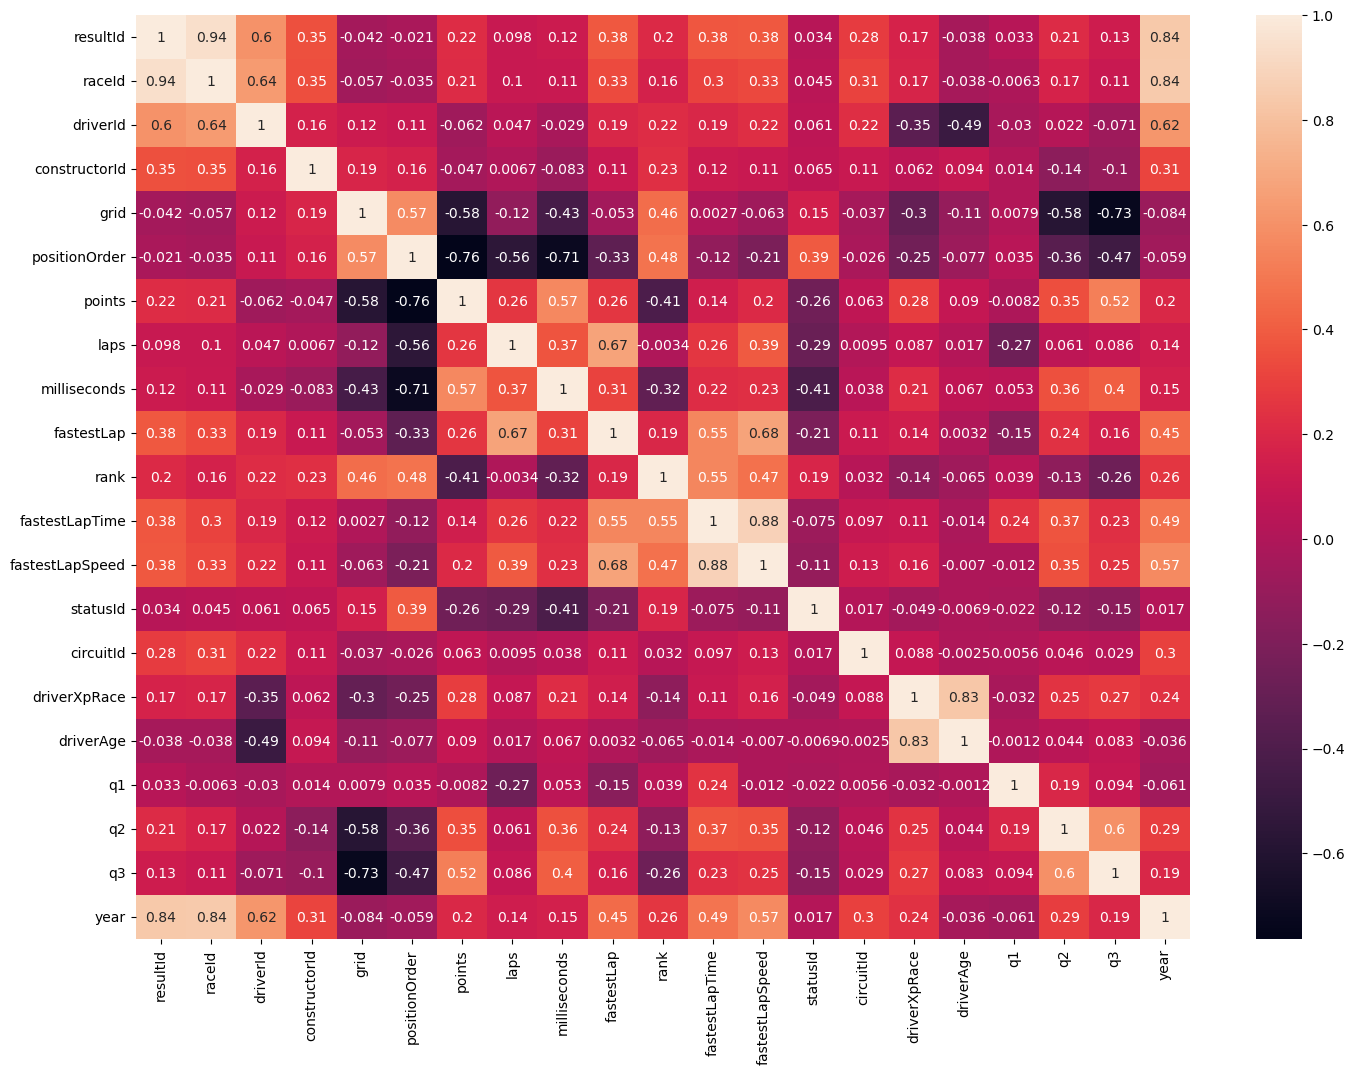

In [189]:
plt.figure(figsize=(17,12))

sns.heatmap(df_train.corr(),annot=True)

In [190]:
# df_train['class']= df_train['positionOrder'].apply(lambda x: 0 if 1 <= x <= 3 else (1 if x <= 10 else 2))
df_train['class']= df_train['positionOrder'].apply(lambda x: 0 if 1 <= x <= 3 else 1)


In [191]:
# information only before race starts
df_train.drop(['fastestLapTime', 'fastestLapSpeed', 'statusId','points','milliseconds','fastestLap','positionOrder'],axis=1, inplace=True)

In [192]:
df_train

,resultId,raceId,driverId,constructorId,grid,laps,rank,circuitId,driverXpRace,driverAge,q1,q2,q3,year,class
0,1,18,1,1,1,58,2,1,18,23,86.572,85.187,86.714,2008.0,0
1,2,18,2,2,5,58,3,1,134,30,85.960,85.518,87.236,2008.0,0
2,3,18,3,3,7,58,5,1,36,22,86.295,86.059,88.687,2008.0,0
3,4,18,4,4,11,58,7,1,106,26,86.907,86.188,0.000,2008.0,1
4,5,18,5,1,3,58,1,1,18,26,85.664,85.452,87.079,2008.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27132,26520,1132,839,214,18,50,16,9,145,27,94.557,0.000,0.000,2024.0,1
27133,26521,1132,815,9,0,50,6,9,271,34,98.348,0.000,0.000,2024.0,1
27134,26522,1132,855,15,14,50,17,9,56,25,91.190,87.867,0.000,2024.0,1
27135,26523,1132,847,131,1,33,19,9,116,26,90.106,86.723,85.819,2024.0,1


In [193]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(df_train.drop(['class'], axis=1), df_train['class'])
X_new.shape

(8388, 10)

In [194]:
cols_idxs = selector.get_support(indices=True)


In [195]:
df= df_train.drop(['class'], axis=1).iloc[:,cols_idxs]
df


,resultId,raceId,driverId,constructorId,grid,laps,rank,driverXpRace,q2,q3
0,1,18,1,1,1,58,2,18,85.187,86.714
1,2,18,2,2,5,58,3,134,85.518,87.236
2,3,18,3,3,7,58,5,36,86.059,88.687
3,4,18,4,4,11,58,7,106,86.188,0.000
4,5,18,5,1,3,58,1,18,85.452,87.079
...,...,...,...,...,...,...,...,...,...,...
27132,26520,1132,839,214,18,50,16,145,0.000,0.000
27133,26521,1132,815,9,0,50,6,271,0.000,0.000
27134,26522,1132,855,15,14,50,17,56,87.867,0.000
27135,26523,1132,847,131,1,33,19,116,86.723,85.819


In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [197]:
y = df_train['class']

<Axes: >

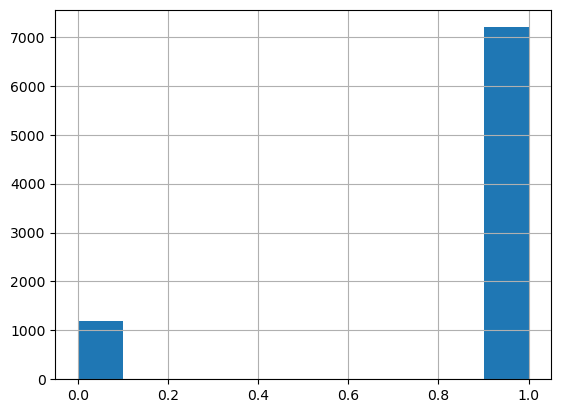

In [198]:
y.hist()

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

In [200]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [201]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# Resampling the dataset to have the same number of classes.

In [202]:
# Define the desired ratios for each class
ratios = {0: 1, 1: 1.15}

# Calculate the sample size for each class based on the ratios
sample_sizes = {}
min_samples = y.value_counts().min()
for class_label in y.unique():
    sample_sizes[class_label] = int(ratios[class_label] * min_samples)

# Create a new resampled DataFrame
df_resampled = pd.DataFrame()
for class_label in y.unique():
    df_class = df_train[y == class_label]
    df_class = df_class.sample(n=sample_sizes[class_label], random_state=42)
    df_resampled = pd.concat([df_resampled, df_class])

In [203]:
y_resampled = df_resampled['class']
y_resampled.value_counts()

class
1    1369
0    1191
Name: count, dtype: int64

<Axes: >

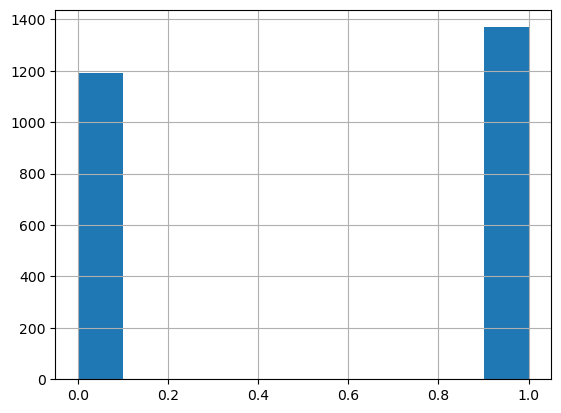

In [204]:
df_resampled['class'].hist()

In [205]:
X_resampled = df_resampled.drop('class', axis=1)

In [206]:
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_resampled.drop(['raceId', 'resultId'],axis=1), y_resampled)
X_new.shape

(2560, 10)

In [207]:
y_resampled

25540    0
4425     0
4514     0
1096     0
22907    0
        ..
20983    1
24568    1
25214    1
25864    1
22066    1
Name: class, Length: 2560, dtype: int64

In [208]:
cols_idxs = selector.get_support(indices=True)
X_resampled.drop(['raceId', 'resultId'],axis=1).iloc[:,cols_idxs]


,driverId,constructorId,grid,laps,rank,circuitId,driverXpRace,driverAge,q2,q3
25540,840,211,10,87,14,3,77,22,53.840,54.200
4425,35,3,3,72,0,25,3,25,0.000,0.000
4514,35,3,2,65,0,4,7,25,0.000,0.000
1096,21,4,6,53,7,22,178,33,90.306,90.599
22907,822,3,2,71,3,70,27,24,69.096,68.846
...,...,...,...,...,...,...,...,...,...,...
20983,808,4,18,9,18,1,2,25,0.000,0.000
24568,842,5,12,70,19,70,14,22,64.874,0.000
25214,847,3,18,54,17,69,19,21,0.000,0.000
25864,846,1,1,53,1,71,53,21,105.827,101.993


In [209]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_new, y_resampled, test_size=0.3, random_state=42)

In [210]:
scaler = StandardScaler()
X_train_transformed_resampled = scaler.fit_transform(X_train_resampled)
X_test_transformed_resampled = scaler.transform(X_test_resampled)

In [211]:
# Initialize the models
clf1 = KNeighborsClassifier(n_neighbors=21, weights='uniform', metric='minkowski', p=1)
clf2 = KMeans(n_clusters=3, n_init='auto')
# List of models
models = [clf1, clf2]

cross_val_score(clf1,X_train_transformed_resampled, y_train_resampled, cv=5).mean()

0.8532469149250712

In [212]:
clf1.fit(X_train_transformed_resampled, y_train_resampled)
accuracy_score(clf1.predict(X_train_transformed_resampled), y_train_resampled)

0.86328125

In [213]:
accuracy_score(clf1.predict(X_test_transformed_resampled), y_test_resampled)

0.8645833333333334

## Grid Search on resampled data

In [214]:

parameters_KNN = {
    'n_neighbors': range(5,25),
    #'leaf_size': (20,40,1),
    'p': (1,2,3,4,5),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev', 'cosine'),

}


In [215]:
clf1 = KNeighborsClassifier()

In [216]:
grid_search_KNN_1= GridSearchCV(
    estimator=clf1,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [217]:
grid_search_KNN_1.fit(X_train_transformed_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev', 'cosine'),
                         'n_neighbors': range(5, 25), 'p': (1, 2, 3, 4, 5),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [218]:
grid_search_KNN_1.best_params_

{'metric': 'minkowski', 'n_neighbors': 8, 'p': 3, 'weights': 'distance'}

In [219]:
grid_search_KNN_1.best_score_

0.8688675868722866

In [220]:
accuracy_score(grid_search_KNN_1.best_estimator_.predict(X_test_transformed_resampled),y_test_resampled)

0.8802083333333334

In [221]:
accuracy_score(grid_search_KNN_1.best_estimator_.predict(X_train_transformed_resampled),y_train_resampled)

1.0

In [222]:
teste= pd.DataFrame(grid_search_KNN_1.best_estimator_.predict(X_test_transformed_resampled))

In [223]:
teste.value_counts()

0    389
1    379
Name: count, dtype: int64

In [224]:
y_test_resampled.value_counts()

class
1    411
0    357
Name: count, dtype: int64

array([[<Axes: title={'center': '0'}>]], dtype=object)

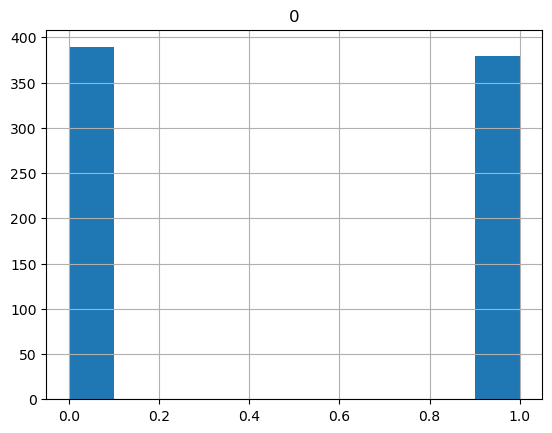

In [225]:
pd.DataFrame(grid_search_KNN_1.best_estimator_.predict(X_test_transformed_resampled)).hist()

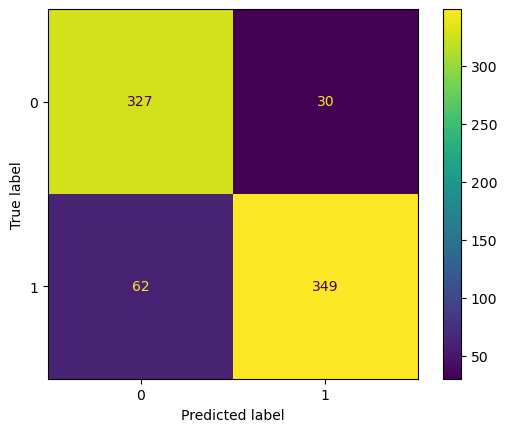

In [226]:
ConfusionMatrixDisplay.from_estimator(grid_search_KNN_1.best_estimator_, X_test_transformed_resampled, y_test_resampled)

In [227]:
y_pred =grid_search_KNN_1.best_estimator_.predict(X_test_transformed_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       357
           1       0.92      0.85      0.88       411

    accuracy                           0.88       768
   macro avg       0.88      0.88      0.88       768
weighted avg       0.88      0.88      0.88       768



# KMeans

In [228]:
from sklearn.metrics import silhouette_score

In [229]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8 ,9 , 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = clusterer.fit_predict(X_train_transformed_resampled)
    silhouette_avg = silhouette_score(X_train_transformed_resampled, cluster_labels)
    accuracy = accuracy_score(cluster_labels, y_train_resampled)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        "Accuracy",
        accuracy
    )
    

For n_clusters = 2 The average silhouette_score is : 0.2396038708720669 Accuracy 0.24497767857142858
For n_clusters = 3 The average silhouette_score is : 0.2280821066317799 Accuracy 0.15848214285714285
For n_clusters = 4 The average silhouette_score is : 0.1929201850848611 Accuracy 0.11439732142857142
For n_clusters = 5 The average silhouette_score is : 0.20281951395076667 Accuracy 0.08984375
For n_clusters = 6 The average silhouette_score is : 0.2092892131993395 Accuracy 0.08984375
For n_clusters = 7 The average silhouette_score is : 0.21095306424984578 Accuracy 0.06808035714285714
For n_clusters = 8 The average silhouette_score is : 0.20028285241756796 Accuracy 0.060267857142857144
For n_clusters = 9 The average silhouette_score is : 0.19800563769034368 Accuracy 0.060267857142857144
For n_clusters = 10 The average silhouette_score is : 0.21131099716202342 Accuracy 0.05747767857142857


In [230]:
from sklearn.metrics.cluster import rand_score

In [231]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_transformed_resampled)
y_pred_kmeans = kmeans.predict(X_test_transformed_resampled)

In [232]:
rand_score(y_test_resampled, y_pred_kmeans)

0.6271322251195133

In [233]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# separating the columns that should be scaled
X_train_to_scale = X_train_resampled[:, 2:10]
X_train_untouched = X_train_resampled[:, :2]

# applying StandardScaler to the selected columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_to_scale)

# concatenating the untouched columns with the scaled columns
X_train_transformed_resampled_kmeans = np.hstack((X_train_untouched, X_train_scaled))

# apply the same transformation to the test data
X_test_to_scale = X_test_resampled[:, 2:10]
X_test_untouched = X_test_resampled[:, :2]
X_test_scaled = scaler.transform(X_test_to_scale)
X_test_transformed_resampled_kmeans = np.hstack((X_test_untouched, X_test_scaled))


print(X_train_transformed_resampled_kmeans[0])

[ 8.07000000e+02  4.00000000e+00 -1.86059495e-01 -6.31539720e-01
  1.59404857e-02 -3.30100213e-01  1.66919762e-01  4.09174860e-01
  9.92994119e-01  1.23051732e+00]


In [234]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8 ,9 , 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = clusterer.fit_predict(X_train_transformed_resampled_kmeans)
    silhouette_avg = silhouette_score(X_train_transformed_resampled_kmeans, cluster_labels)
    accuracy = accuracy_score(cluster_labels, y_train_resampled)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        "Accuracy",
        accuracy
    )
    

For n_clusters = 2 The average silhouette_score is : 0.901567139235075 Accuracy 0.5770089285714286
For n_clusters = 3 The average silhouette_score is : 0.8270255630273257 Accuracy 0.33872767857142855
For n_clusters = 4 The average silhouette_score is : 0.8032208655195615 Accuracy 0.25502232142857145
For n_clusters = 5 The average silhouette_score is : 0.7993978959804745 Accuracy 0.17466517857142858
For n_clusters = 6 The average silhouette_score is : 0.7942224102482304 Accuracy 0.17466517857142858
For n_clusters = 7 The average silhouette_score is : 0.8170855151145379 Accuracy 0.16964285714285715
For n_clusters = 8 The average silhouette_score is : 0.7782798902251885 Accuracy 0.16964285714285715
For n_clusters = 9 The average silhouette_score is : 0.6739428308295464 Accuracy 0.08314732142857142
For n_clusters = 10 The average silhouette_score is : 0.668566129498082 Accuracy 0.08314732142857142


In [235]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_transformed_resampled_kmeans)
y_pred_kmeans = kmeans.predict(X_test_transformed_resampled_kmeans)

In [236]:
rand_score(y_test_resampled, y_pred_kmeans)

0.5062235169491526

# Decision Tree

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_transformed_resampled, y_train_resampled)

RandomForestClassifier()

In [239]:
y_pred_random_forest = random_forest.predict(X_test_transformed_resampled)

In [240]:
accuracy_score(y_test_resampled, y_pred_random_forest)

0.88671875

In [241]:
print(classification_report(y_test_resampled, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       357
           1       0.90      0.89      0.89       411

    accuracy                           0.89       768
   macro avg       0.89      0.89      0.89       768
weighted avg       0.89      0.89      0.89       768

